# Problem Statement
---
Reddit is a collection of online discussion boards known as "subreddits", which cover a variety of topics. In this project we will be looking into the subreddits, dating_advice and relationship_advice. The choice of these two subreddits is motivated by their text-heavy posts. We will be creating and comparing two models: a logistic regression and a multinomial naive Bayes classifier. Our results may be useful for any reddit user who is unsure which subreddit is the most appropriate to submit his new post, so that he can attract the most comments.

# Data Collection

In [1]:
import requests
import pandas as pd
import time
import random

In [10]:
# Define function to scrape data
def scraping(urls, num_req):
    posts = []
    for url in urls:
        after = None
        for i in range(num_req):
            if after == None:
                current_url = url
            else:
                current_url = url + '?after=' + after
            res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
        
            if res.status_code == 200:
                current_dict = res.json()
                posts.extend(current_dict['data']['children'])
                after = current_dict['data']['after']
            else:
                print('Status error', res.status_code)
                break
            sleep_duration = random.randint(2,6)
            time.sleep(sleep_duration)
    
    # Extract name id, title, text and subreddit origin from data and return in a DataFrame
    names, titles, texts, subreddits = [], [], [], []
    for i in range(len(posts)):
        names.append(posts[i]['data']['name'])
        titles.append(posts[i]['data']['title'])
        texts.append(posts[i]['data']['selftext'])
        subreddits.append(posts[i]['data']['subreddit'])
    return pd.DataFrame({'name': names, 'title': titles, 'text': texts, 'subreddit': subreddits})

In [11]:
# Scrape posts from subreddits
df = scraping([
    'https://www.reddit.com/r/dating_advice.json',
    'https://www.reddit.com/r/relationship_advice.json'
], num_req=50)

In [13]:
print(df.shape)
df.head()

(2502, 4)


,name,title,text,subreddit
0,t3_co1xjb,FAQ: Where do you meet people?,Hi everyone. In an effort to put together a FA...,dating_advice
1,t3_dkzok7,"Daily Free-for-all Discussion- October 21, 2019",Welcome to /r/dating_advice. Please use this d...,dating_advice
2,t3_dlf3t6,No girl ever seemed interested in me [19M],Almost all my friends have/have had girlfriend...,dating_advice
3,t3_dlon52,It sucks being an introvert in an extrovert’s ...,I’ve had a lot of dates describe me as timid o...,dating_advice
4,t3_dlq2hv,Guys do you like it when a girl asks you out?,Im (f24) I’m thinking of asking out this boy(m...,dating_advice


In [44]:
print(1252/2502)
print(1250/2502)

0.5003996802557954
0.49960031974420466


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

dating_advice          1252
relationship_advice    1250
Name: subreddit, dtype: int64


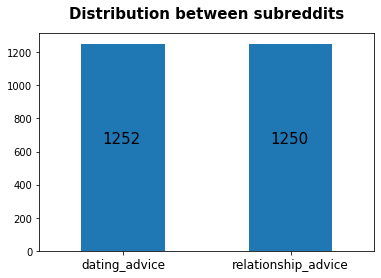

In [46]:
print(df['subreddit'].value_counts())
df['subreddit'].value_counts().plot(kind='bar');
# plot
plt.xticks(fontsize=12,rotation=0);
plt.title('Distribution between subreddits',fontsize=15,pad=15,fontweight='bold');
plt.figtext(0.27,0.5,1252,fontsize=15);
plt.figtext(0.66,0.5,1250,fontsize=15);

In [35]:
# export data scraped to csv
df.to_csv('data/reddit-posts.csv', index=False)